In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [4]:
train_dataset, test_dataset = get_test_datasets('yacht_hydrodynamics', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('yacht_hydrodynamics', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('yacht_hydrodynamics')
num_tries = 15

dataset_shapes

([6], [1])

### S(2,2,2)

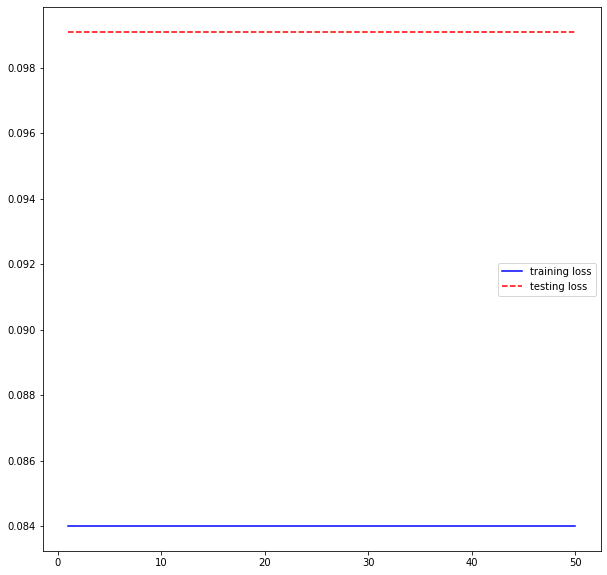

Elapsed training time: 3.99314 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 14        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=50, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### S(10,7,5)

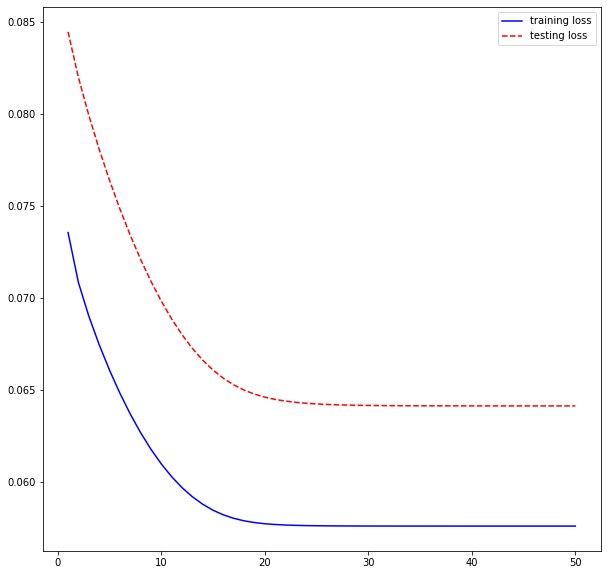

Elapsed training time: 2.99648 sec
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=50, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(2):U(2)

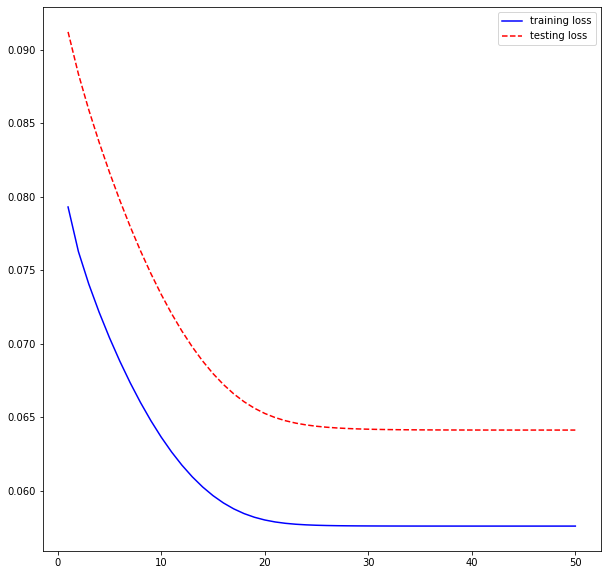

Elapsed training time: 3.18479 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
v_input (VInput)             (None, 7, 2)              14        
_________________________________________________________________
v_fractal (VFractal)         (None, 3, 1)              37        
_________________________________________________________________
v_output_1 (VOutput)         (None, 1)                 0         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=50, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(5):U(2)

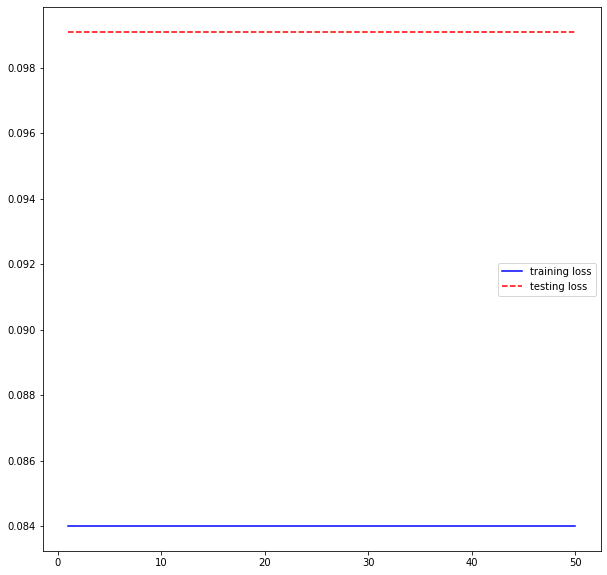

Elapsed training time: 3.27666 sec
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
v_input_2 (VInput)           (None, 7, 5)              35        
_________________________________________________________________
v_fractal_2 (VFractal)       (None, 6, 1)              91        
_________________________________________________________________
v_output_3 (VOutput)         (None, 1)                 0         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=50, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)